In [14]:
import requests
import json
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
    'start': '1',
    'limit': '100',
    'convert': 'USD'
}

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'cf47f1f3-5841-4f58-8802-8b167c08e3e1'  # Replace this
}

session = requests.Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [15]:
type(data)

dict

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [30]:
df = pd.json_normalize(data['data'])  
df['pulled_at'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,pulled_at
0,1,Bitcoin,BTC,bitcoin,12231,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988611e+07,1.988611e+07,False,NaN,1,NaN,NaN,NaN,2025-07-01T18:25:00.000Z,105965.658998,4.259705e+10,0.5302,-0.329655,-1.288894,0.088673,1.059383,8.690525,22.614450,2.107244e+12,64.5922,2.225279e+12,NaN,2025-07-01T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 00:02:29.214596
1,1027,Ethereum,ETH,ethereum,10359,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207176e+08,1.207176e+08,True,NaN,2,NaN,NaN,NaN,2025-07-01T18:25:00.000Z,2423.685734,1.526190e+10,-16.8375,-0.329237,-2.766474,-0.842453,-3.805704,30.857163,28.050903,2.925814e+11,8.9683,2.925814e+11,NaN,2025-07-01T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 00:02:29.214596
2,825,Tether USDt,USDT,tether,134452,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.577152e+11,1.598262e+11,True,NaN,3,NaN,NaN,NaN,2025-07-01T18:25:00.000Z,1.000292,6.172193e+10,-3.9276,0.002320,-0.004647,-0.026861,-0.006090,-0.013541,0.042398,1.577613e+11,4.8358,1.598729e+11,NaN,2025-07-01T18:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-02 00:02:29.214596
3,52,XRP,XRP,xrp,1635,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.900555e+10,9.998599e+10,False,NaN,4,NaN,NaN,NaN,2025-07-01T18:25:00.000Z,2.180961,4.396543e+09,89.2621,-0.661377,-1.858954,-0.593276,0.958965,-1.554035,2.048050,1.286888e+11,3.9446,2.180961e+11,NaN,2025-07-01T18:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 00:02:29.214596
4,1839,BNB,BNB,bnb,2597,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408854e+08,1.408854e+08,False,NaN,5,NaN,NaN,NaN,2025-07-01T18:26:00.000Z,645.366525,1.385840e+09,-7.4898,-0.219718,-1.894883,0.357117,-1.330390,7.499104,6.943795,9.092272e+10,2.7875,9.092272e+10,NaN,2025-07-01T18:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-02 00:02:29.214596


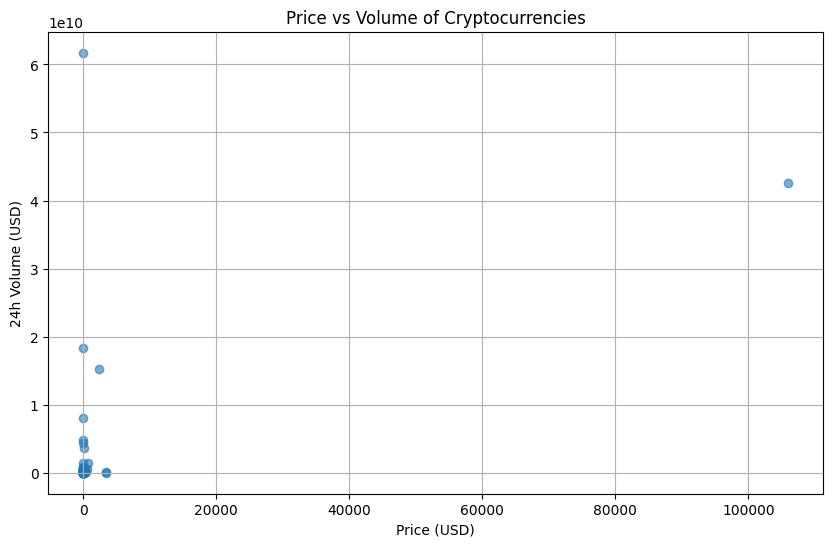

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['quote.USD.price'], df['quote.USD.volume_24h'], alpha=0.6)
plt.xlabel('Price (USD)')
plt.ylabel('24h Volume (USD)')
plt.title('Price vs Volume of Cryptocurrencies')
plt.grid(True)
plt.show()

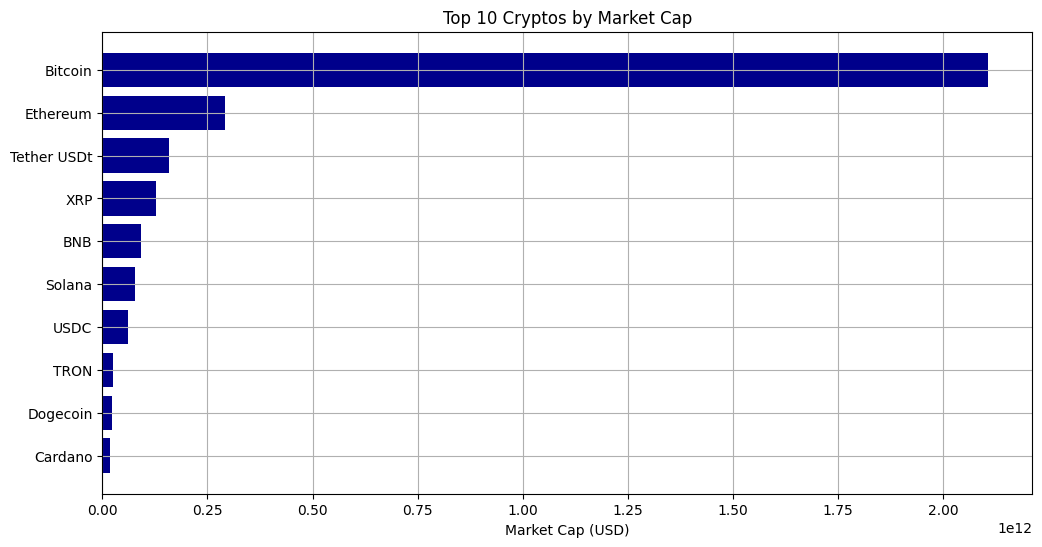

In [21]:
top10 = df.nlargest(10, 'quote.USD.market_cap')
plt.figure(figsize=(12,6))
plt.barh(top10['name'], top10['quote.USD.market_cap'], color='darkblue')
plt.xlabel('Market Cap (USD)')
plt.title('Top 10 Cryptos by Market Cap')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

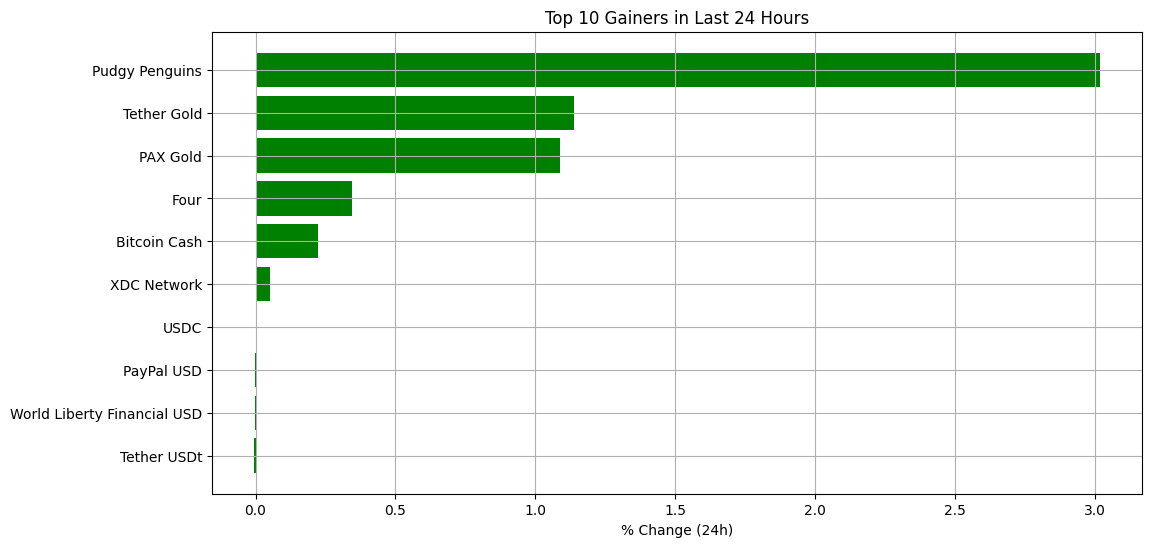

In [22]:
gainers = df.nlargest(10, 'quote.USD.percent_change_24h')

plt.figure(figsize=(12,6))
plt.barh(gainers['name'], gainers['quote.USD.percent_change_24h'], color='green')
plt.xlabel('% Change (24h)')
plt.title('Top 10 Gainers in Last 24 Hours')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

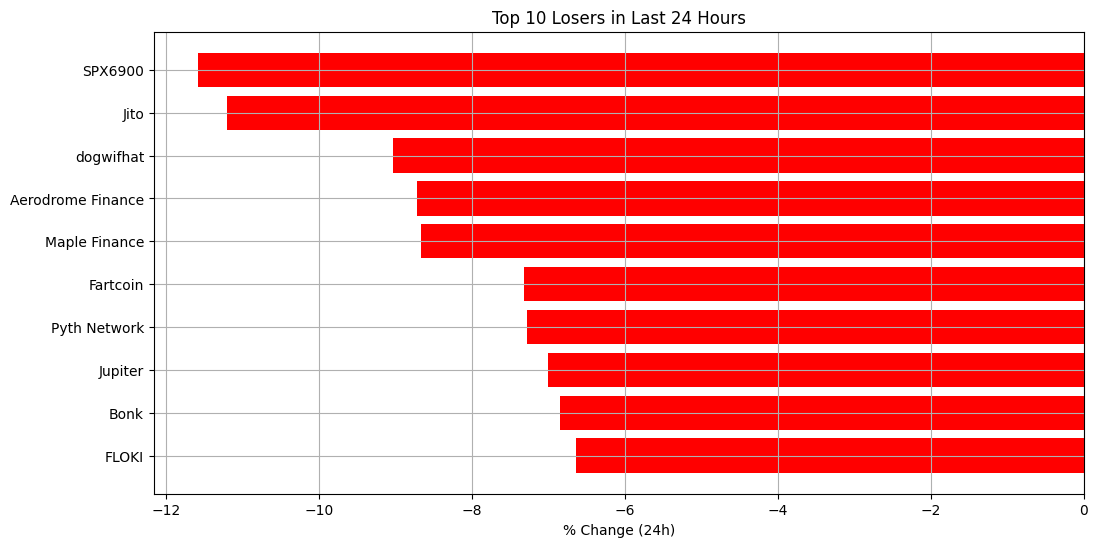

In [28]:
losers = df.nsmallest(10, 'quote.USD.percent_change_24h')

plt.figure(figsize=(12,6))
plt.barh(losers['name'], losers['quote.USD.percent_change_24h'], color='red')
plt.xlabel('% Change (24h)')
plt.title('Top 10 Losers in Last 24 Hours')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

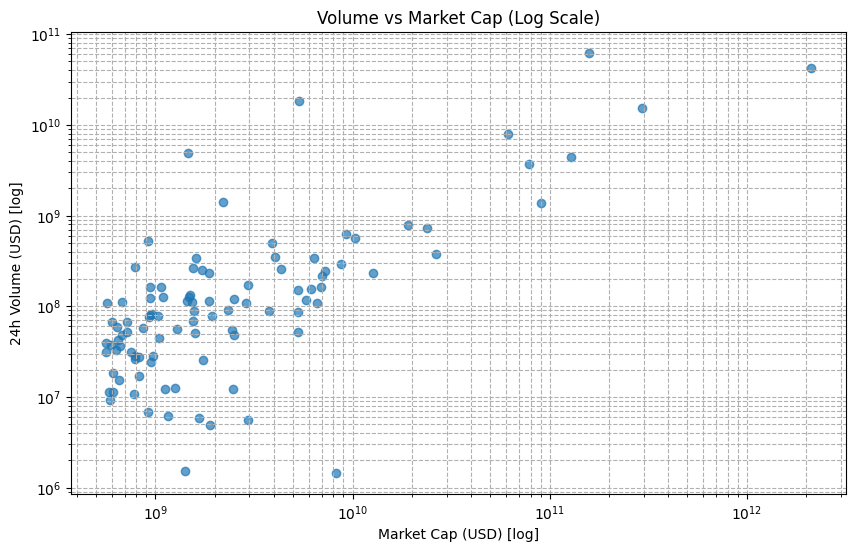

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['quote.USD.market_cap'], df['quote.USD.volume_24h'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Market Cap (USD) [log]')
plt.ylabel('24h Volume (USD) [log]')
plt.title('Volume vs Market Cap (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

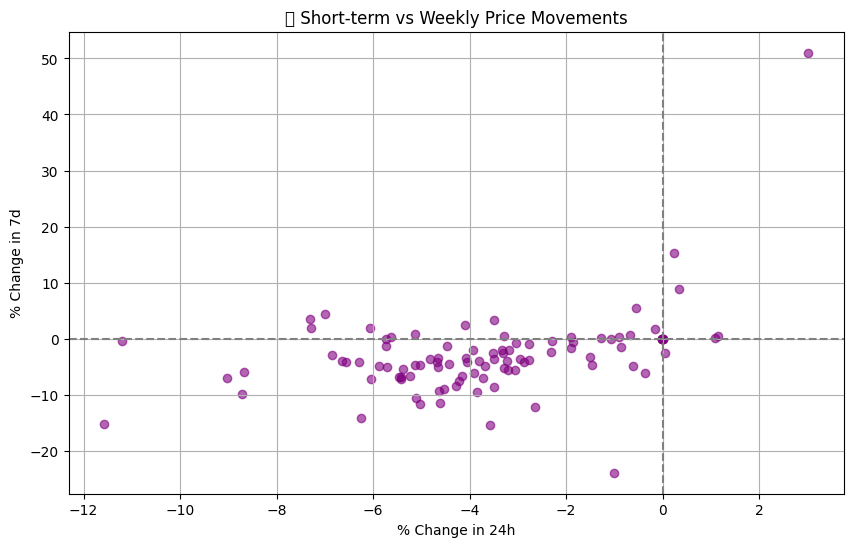

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df['quote.USD.percent_change_24h'], df['quote.USD.percent_change_7d'], alpha=0.6, color='purple')
plt.xlabel('% Change in 24h')
plt.ylabel('% Change in 7d')
plt.title('📉 Short-term vs Weekly Price Movements')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

In [26]:
summary = df[['name', 'symbol', 'quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.market_cap', 'quote.USD.percent_change_24h']]
summary_sorted = summary.sort_values(by='quote.USD.market_cap', ascending=False).head(10)
display(summary_sorted)

,name,symbol,quote.USD.price,quote.USD.volume_24h,quote.USD.market_cap,quote.USD.percent_change_24h
0,Bitcoin,BTC,105965.658998,4.259705e+10,2.107244e+12,-1.288894
1,Ethereum,ETH,2423.685734,1.526190e+10,2.925814e+11,-2.766474
2,Tether USDt,USDT,1.000292,6.172193e+10,1.577613e+11,-0.004647
3,XRP,XRP,2.180961,4.396543e+09,1.286888e+11,-1.858954
4,BNB,BNB,645.366525,1.385840e+09,9.092272e+10,-1.894883
5,Solana,SOL,147.074636,3.672150e+09,7.862754e+10,-6.072435
6,USDC,USDC,1.000045,8.016655e+09,6.165202e+10,0.000776
7,TRON,TRX,0.278759,3.791196e+08,2.642469e+10,-0.157945
8,Dogecoin,DOGE,0.158464,7.237788e+08,2.375654e+10,-4.066692
9,Cardano,ADA,0.542163,7.937215e+08,1.917964e+10,-5.414293


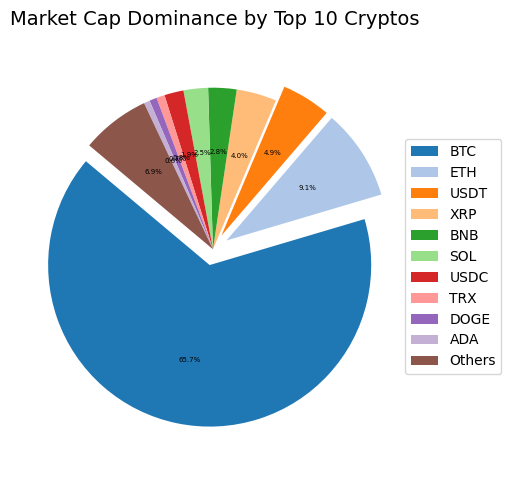

In [48]:
import matplotlib.pyplot as plt

top10_dominance = df.nlargest(10, 'quote.USD.market_cap')
others = df['quote.USD.market_cap'].sum() - top10_dominance['quote.USD.market_cap'].sum()

labels = list(top10_dominance['symbol']) + ['Others']
sizes = list(top10_dominance['quote.USD.market_cap']) + [others]

explode = [0.1 if i < 3 else 0 for i in range(len(labels))]

colors = plt.cm.tab20.colors[:len(labels)]
plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 5}
)
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Market Cap Dominance by Top 10 Cryptos", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

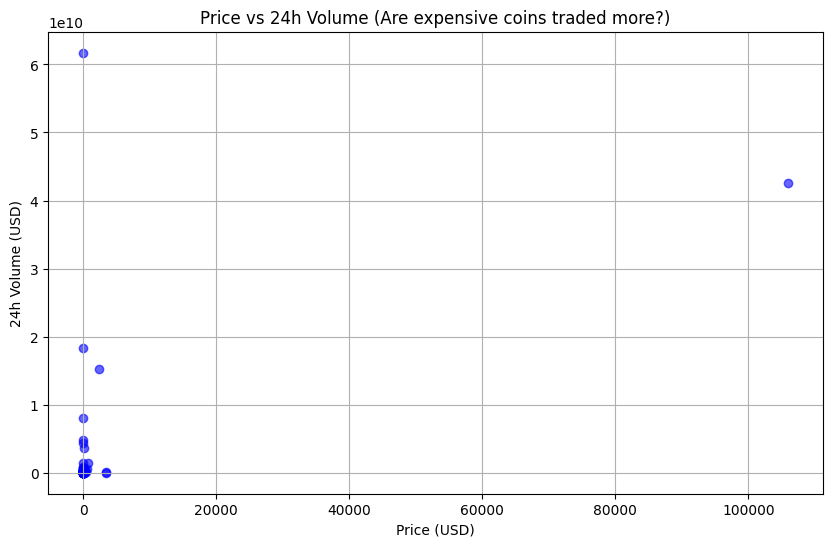

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df['quote.USD.price'], df['quote.USD.volume_24h'], alpha=0.6, color='blue')
plt.title("Price vs 24h Volume (Are expensive coins traded more?)")
plt.xlabel("Price (USD)")
plt.ylabel("24h Volume (USD)")
plt.grid(True)
plt.show()

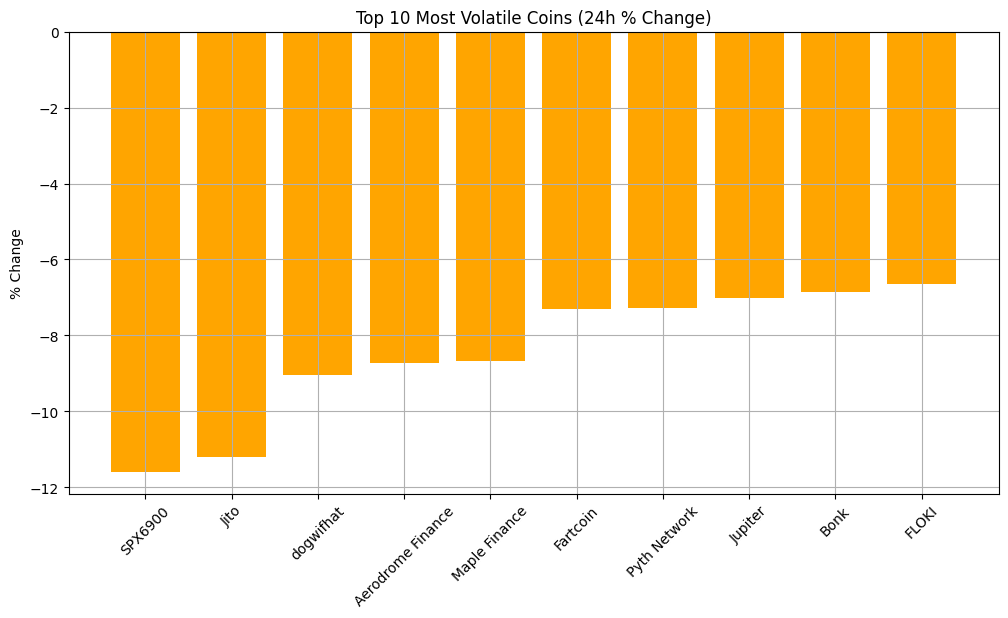

In [37]:
most_volatile = df.reindex(df['quote.USD.percent_change_24h'].abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(12,6))
plt.bar(most_volatile['name'], most_volatile['quote.USD.percent_change_24h'], color='orange')
plt.xticks(rotation=45)
plt.title("Top 10 Most Volatile Coins (24h % Change)")
plt.ylabel("% Change")
plt.grid(True)
plt.show()

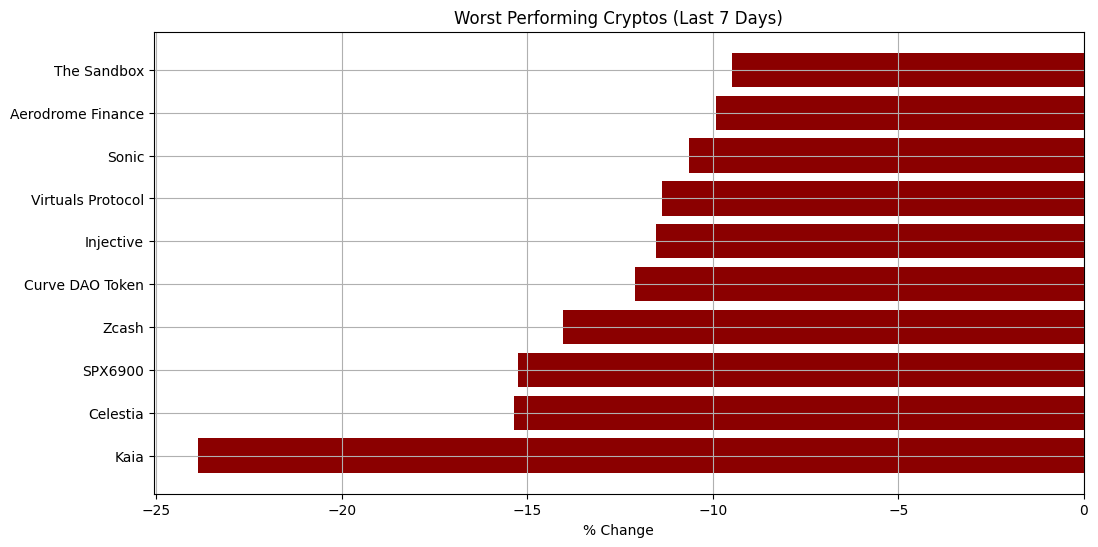

In [39]:
top_losers_week = df.nsmallest(10, 'quote.USD.percent_change_7d')

plt.figure(figsize=(12,6))
plt.barh(top_losers_week['name'], top_losers_week['quote.USD.percent_change_7d'], color='darkred')
plt.title("Worst Performing Cryptos (Last 7 Days)")
plt.xlabel("% Change")
plt.grid(True)
plt.show()

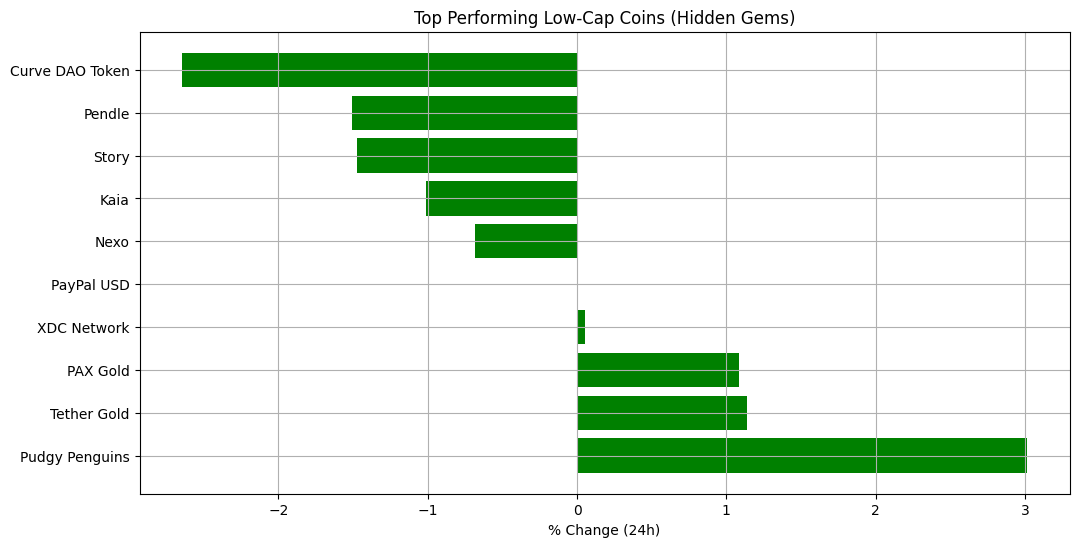

In [41]:
lowcap = df[df['quote.USD.market_cap'] < 1_000_000_000]  # < $1B market cap
top_lowcap = lowcap.nlargest(10, 'quote.USD.percent_change_24h')

plt.figure(figsize=(12,6))
plt.barh(top_lowcap['name'], top_lowcap['quote.USD.percent_change_24h'], color='green')
plt.title("Top Performing Low-Cap Coins (Hidden Gems)")
plt.xlabel("% Change (24h)")
plt.grid(True)
plt.show()

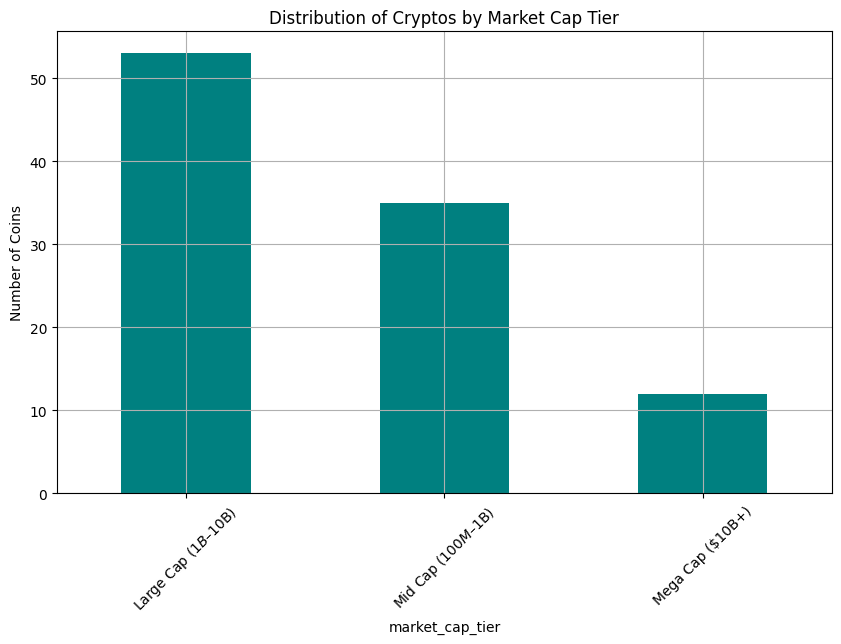

In [42]:
def classify_market_cap(cap):
    if cap >= 10_000_000_000:
        return 'Mega Cap ($10B+)'
    elif cap >= 1_000_000_000:
        return 'Large Cap ($1B–$10B)'
    elif cap >= 100_000_000:
        return 'Mid Cap ($100M–$1B)'
    else:
        return 'Small Cap (<$100M)'

df['market_cap_tier'] = df['quote.USD.market_cap'].apply(classify_market_cap)

tier_counts = df['market_cap_tier'].value_counts()

tier_counts.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Distribution of Cryptos by Market Cap Tier")
plt.ylabel("Number of Coins")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [43]:
print("Average Price of All Coins:", round(df['quote.USD.price'].mean(), 2))
print("Average Market Cap (USD):", round(df['quote.USD.market_cap'].mean(), 2))
print("Average 24h Volume (USD):", round(df['quote.USD.volume_24h'].mean(), 2))
print("Average % Change 24h:", round(df['quote.USD.percent_change_24h'].mean(), 2))
print("Average % Change 7d:", round(df['quote.USD.percent_change_7d'].mean(), 2))

Average Price of All Coins: 1178.03
Average Market Cap (USD): 32073064651.74
Average 24h Volume (USD): 1735302428.03
Average % Change 24h: -3.61
Average % Change 7d: -2.95


In [44]:
btc = df[df['symbol'] == 'BTC']
eth = df[df['symbol'] == 'ETH']

btc_price = btc['quote.USD.price'].values[0]
eth_price = eth['quote.USD.price'].values[0]
btc_market_cap = btc['quote.USD.market_cap'].values[0]
eth_market_cap = eth['quote.USD.market_cap'].values[0]

print(f"BTC Price: ${btc_price:,.2f} | Market Cap: ${btc_market_cap/1e9:.2f}B")
print(f"ETH Price: ${eth_price:,.2f} | Market Cap: ${eth_market_cap/1e9:.2f}B")

BTC Price: $105,965.66 | Market Cap: $2107.24B
ETH Price: $2,423.69 | Market Cap: $292.58B


In [49]:
df.to_csv('crypto_data.csv', index=False)
print("Data saved to crypto_data.csv")

Data saved to crypto_data.csv
